In [324]:
import pandas as pd
import numpy as np
#%matplotlib nbagg
import matplotlib.pyplot as plt
from datetime import datetime

In [287]:
df = pd.DataFrame()
path = "data_csv\\2017_05_"
csv = ".csv"
for num in range(14,30):
    tempPath = path+str(num)+csv
    #print(tempPath)
    df = pd.concat([df,pd.read_csv(tempPath,low_memory=False)])

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197052 entries, 0 to 91093
Data columns (total 8 columns):
Status       1197052 non-null object
FirstLine    1197052 non-null object
Lon          1197052 non-null float64
Lines        1197052 non-null object
Time         1197052 non-null object
Lat          1197052 non-null float64
LowFloor     1197052 non-null bool
Brigade      1197052 non-null object
dtypes: bool(1), float64(2), object(5)
memory usage: 74.2+ MB


In [289]:
lines=[1,2, 3, 4, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 31, 33, 35, 44]
data = df
arrayWithData = list()
for line in lines:
    dataTemp = data[data.FirstLine==line]
    dataTempLon = dataTemp[np.abs(dataTemp.Lon-dataTemp.Lon.mean())<3*dataTemp.Lon.std()]
    dataTempLonLat = dataTempLon[np.abs(dataTempLon.Lat-dataTempLon.Lat.mean())<3*dataTempLon.Lat.std()]
    arrayWithData.append(dataTempLonLat)


In [290]:
counterLine = []
counterNumber = []
for line in arrayWithData:
    counterLine.append(line.iloc[0].FirstLine)
    counterNumber.append(line.FirstLine.count())


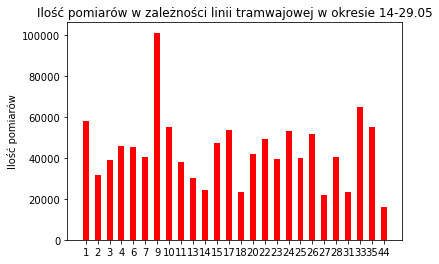

In [298]:
ind = np.arange(len(lines))  # the x locations for the groups
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, counterNumber, width, color='r')
lineStr = tuple(map(lambda x: str(x), lines))
ax.set_xticklabels(lineStr)
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość pomiarów w zależności linii tramwajowej w okresie 14-29.05')
ax.set_xticks(ind)
plt.show()

In [292]:
data.Time.iloc[0]

'2017-05-14T20:35:37'

In [293]:
str(datetime.strptime(data.Time.iloc[0],"%Y-%m-%dT%H:%M:%S").date())

'2017-05-14'

In [294]:
datesSeries = pd.Series(map(lambda x: str(datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").date()),data.Time))
dayofweekSeries = pd.Series(map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").isoweekday(),data.Time))

In [295]:
data = data.assign(Date=datesSeries.values)
data = data.assign(DayOfWeek=dayofweekSeries.values)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197052 entries, 0 to 91093
Data columns (total 10 columns):
Status       1197052 non-null object
FirstLine    1197052 non-null object
Lon          1197052 non-null float64
Lines        1197052 non-null object
Time         1197052 non-null object
Lat          1197052 non-null float64
LowFloor     1197052 non-null bool
Brigade      1197052 non-null object
Date         1197052 non-null object
DayOfWeek    1197052 non-null int64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 92.5+ MB


In [299]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196209 entries, 0 to 91093
Data columns (total 10 columns):
Status       1196209 non-null object
FirstLine    1196209 non-null object
Lon          1196209 non-null float64
Lines        1196209 non-null object
Time         1196209 non-null object
Lat          1196209 non-null float64
LowFloor     1196209 non-null bool
Brigade      1196209 non-null object
Date         1196209 non-null object
DayOfWeek    1196209 non-null int64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 92.4+ MB


In [310]:
data_grouped = data.groupby(['Date']).size()
data_grouped_dropped=data_grouped.drop(['2017-05-14', '2017-05-15'])
unique_dates = data.Date.unique()
tuple(unique_dates)

('2017-05-14',
 '2017-05-15',
 '2017-05-16',
 '2017-05-17',
 '2017-05-18',
 '2017-05-19',
 '2017-05-20',
 '2017-05-21',
 '2017-05-22',
 '2017-05-23',
 '2017-05-24',
 '2017-05-25',
 '2017-05-26',
 '2017-05-27',
 '2017-05-28',
 '2017-05-29')

In [311]:

dates = data_grouped_dropped.index.values
counter_per_date = data_grouped_dropped.values
unique_dates = unique_dates[2:]
unique_dates

array(['2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19',
       '2017-05-20', '2017-05-21', '2017-05-22', '2017-05-23',
       '2017-05-24', '2017-05-25', '2017-05-26', '2017-05-27',
       '2017-05-28', '2017-05-29'], dtype=object)

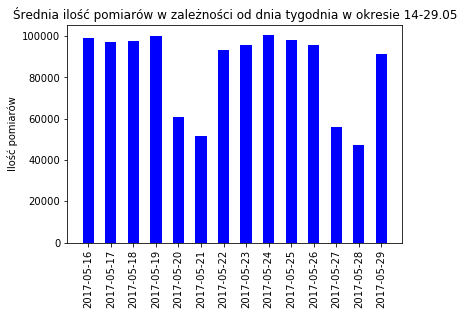

In [313]:
ind = np.arange(len(unique_dates))
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, counter_per_date, width, color='b')

ax.set_xticklabels(tuple(unique_dates),rotation='vertical')
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Średnia ilość pomiarów w zależności od dnia tygodnia w okresie 14-29.05')
ax.set_xticks(ind)
plt.show()

In [355]:
N = 7
first_week = list(counter_per_date[0:6])
first_week.append(counter_per_date[13])
first_week

[98941, 97381, 97889, 99872, 60941, 51797, 91426]

In [356]:
second_week = list(counter_per_date[6:13])
second_week

[93328, 95829, 100336, 98326, 95587, 55807, 47484]

In [357]:
                                   
indx = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, first_week, width, color='r')


rects2 = ax.bar(ind + width, second_week, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Pn', 'Wt', 'Sr', 'Cz', 'Pt','Sb', 'Nd'))

ax.legend((rects1[0], rects2[0]), ('1 tydzien', '2 tydzien'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 14 or scalar